In [2]:
#To conduct K-Means clustering followed by Principle COmponent Analysis in order to segment the credit card market.
#Segmentation is conducted in order to identify different segments to personlise strategies for segements separately.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
creditcard_df = pd.read_csv('C:/Users/vishn/Downloads/archive (3)/CC GENERAL.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df

In [5]:
print("The minimum, mean and maximum balance are:", "\n", creditcard_df["BALANCE"].min(), "\n", creditcard_df["BALANCE"].mean(), "\n", creditcard_df["BALANCE"].max(), "\n")
creditcard_df.describe()

The minimum, mean and maximum balance are: 
 0.0 
 1564.4748276781006 
 19043.13856 



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == creditcard_df["ONEOFF_PURCHASES"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
x = creditcard_df[creditcard_df["CASH_ADVANCE"] == creditcard_df["CASH_ADVANCE"].max()]
x

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [8]:
y = x["CUST_ID"].item()
z = x["CASH_ADVANCE"].item()
print(f"This person with the id {y} paid a cash advance of {z}")

This person with the id C12226 paid a cash advance of 47137.21176


In [9]:
b = creditcard_df
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
#As we can see, there are many null values concentrated in 2 columns, in the next step, we eliminate these null values.

In [11]:
b.loc[b['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = b['CREDIT_LIMIT'].mean()
b.loc[b['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = b['MINIMUM_PAYMENTS'].mean()
b.isnull().sum()
b.duplicated().sum()
b.drop("CUST_ID", axis = 1, inplace= True)

<Axes: >

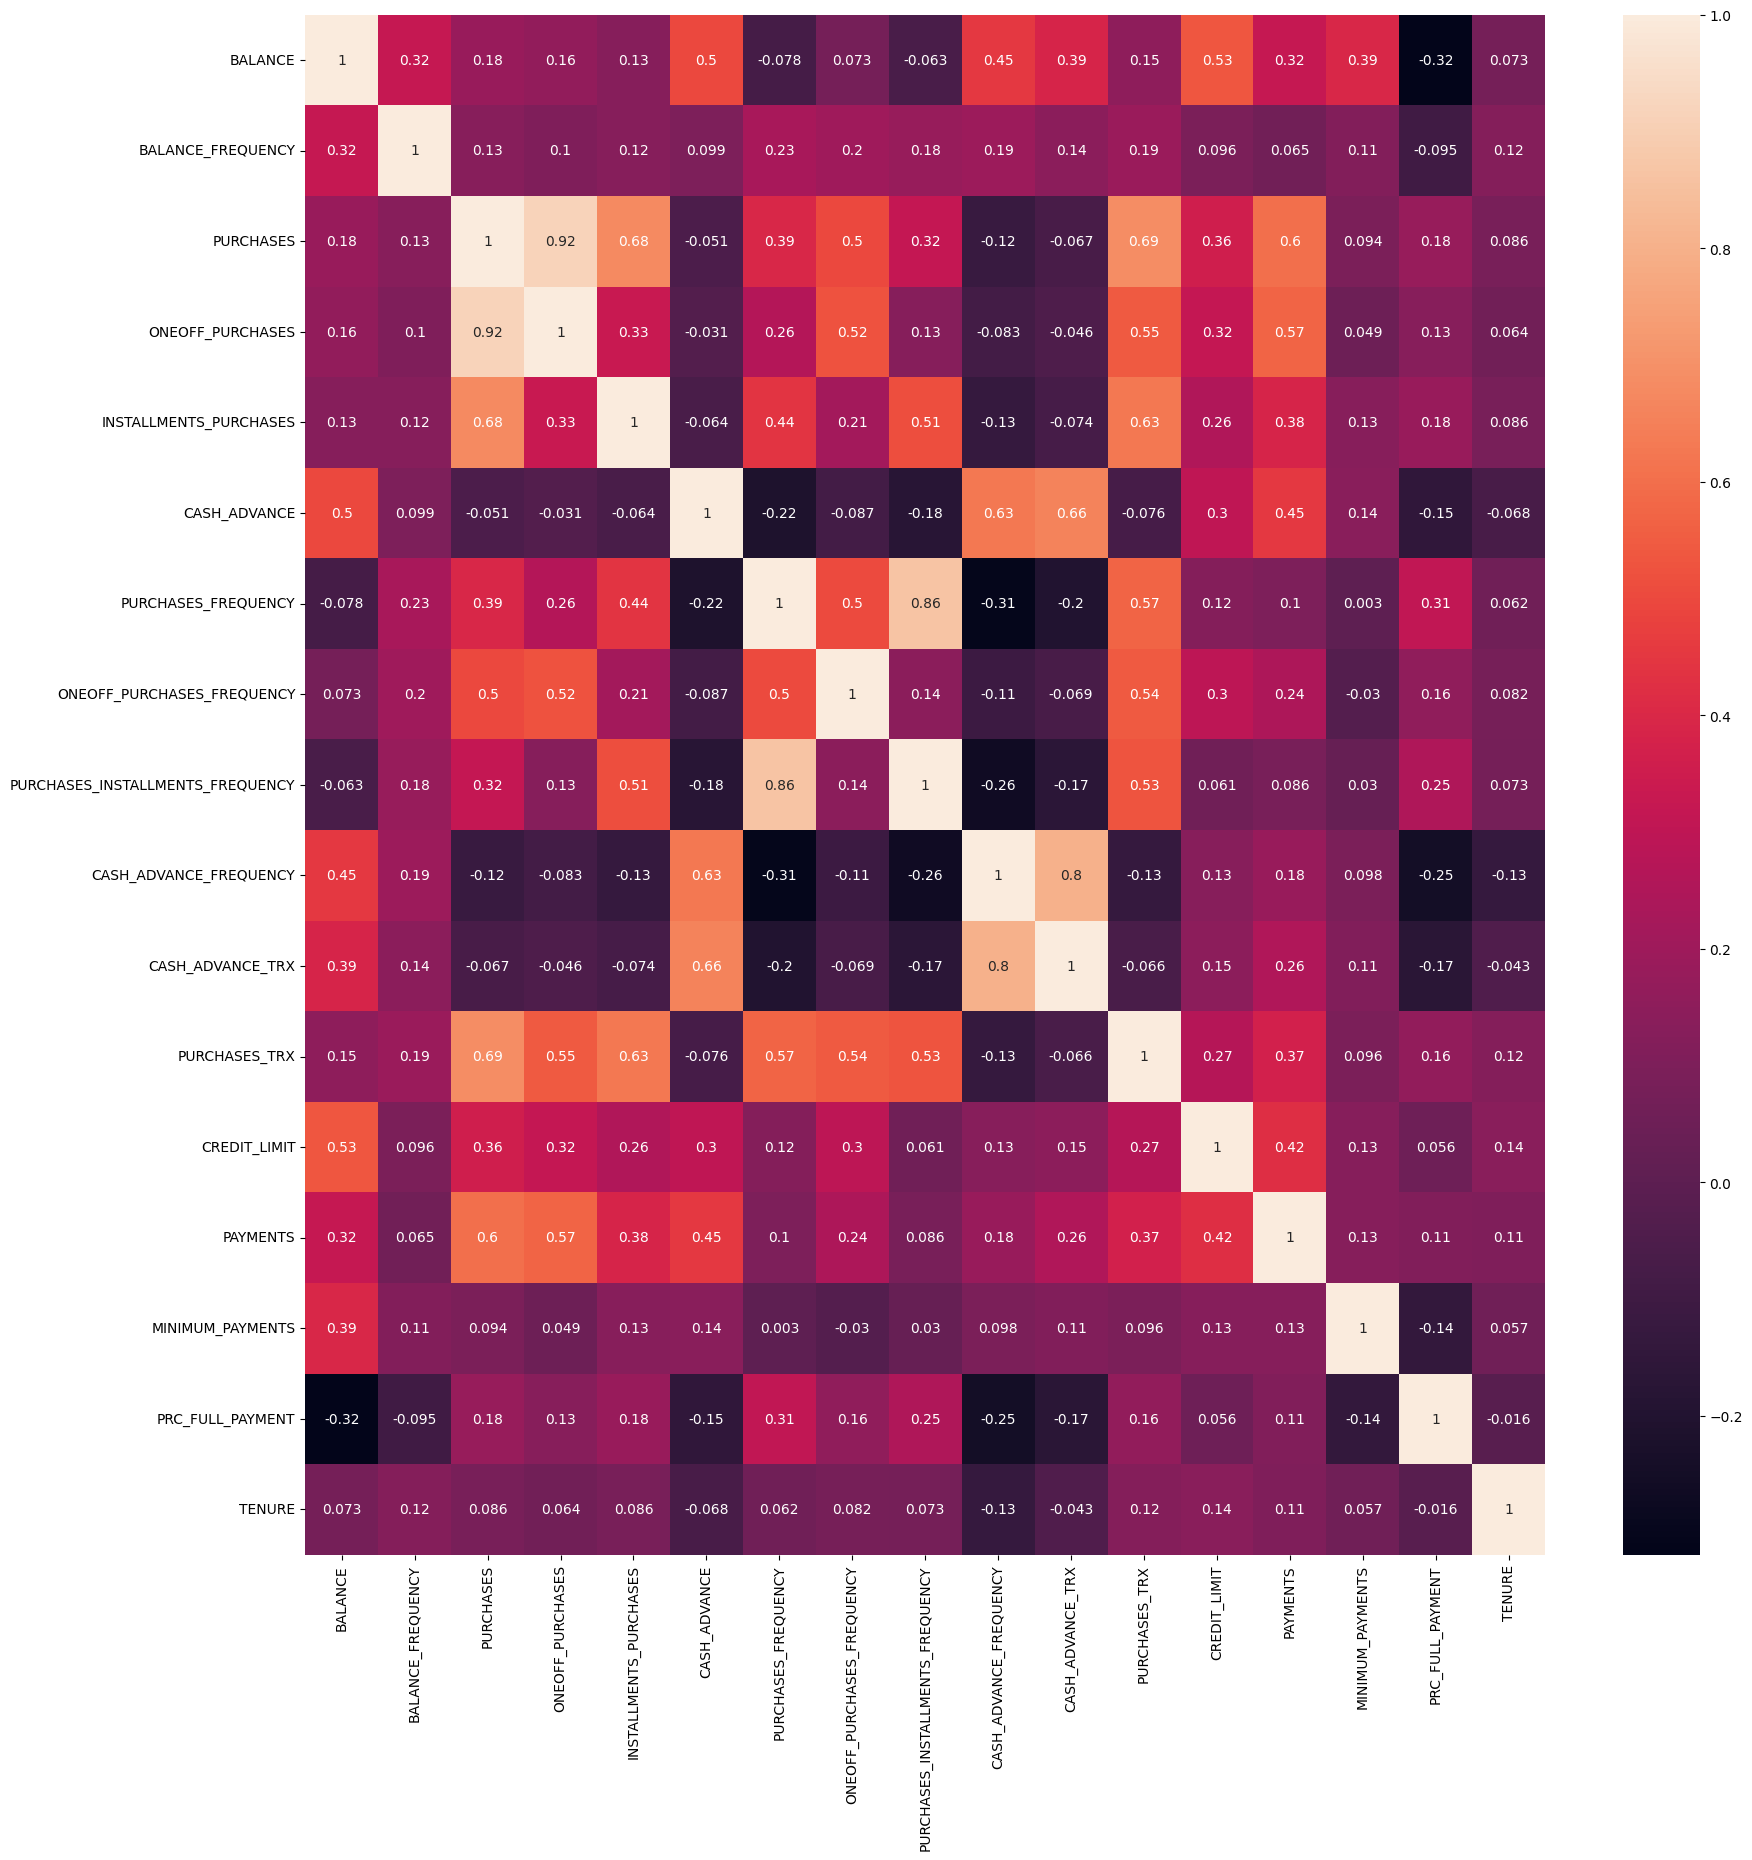

In [12]:
corr = b.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)


In [13]:
#The heatmap shows the positive/negative correlation between the features.
#Hence we can figure out how are the different factors dependent on each other

In [14]:
scaler = StandardScaler()
bs = scaler.fit_transform(b)
bs.shape

(8950, 17)

In [15]:
bs

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

<function matplotlib.pyplot.show(close=None, block=None)>

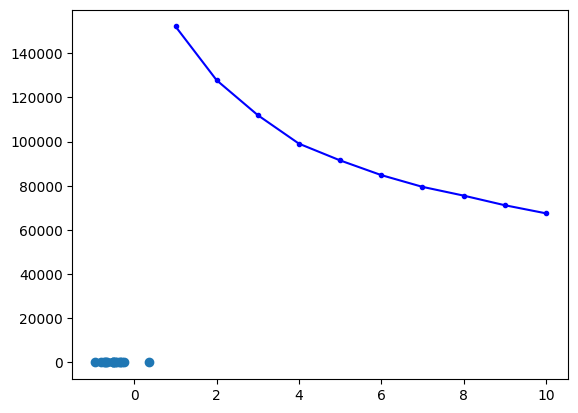

In [16]:
plt.scatter(bs[0], bs[1])
kmeans_kwargs={
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}
sse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(bs)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11), sse, 'b.-')
plt.show

In [17]:
#now as we can see on the elbow curve, the hinge is seen at i = 4, however it is at i=7 that the graph is linear
#Hence we choose number of clusters as 7

In [18]:
kmeans = KMeans(7)
kmeans.fit(bs)
labels = kmeans.labels_

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339375,0.353988,0.042773,-0.077738,0.243653,-0.369148,0.983246,0.223484,0.895306,-0.472314,-0.360665,0.240797,-0.133125,-0.172736,-0.085195,0.345803,0.272364
1,1.642982,0.396855,-0.220769,-0.156266,-0.234988,1.956048,-0.469120,-0.188922,-0.423033,1.885226,1.874544,-0.264447,0.999108,0.770396,0.542599,-0.397768,0.067294
2,0.006319,0.402984,-0.347529,-0.228085,-0.402462,-0.108870,-0.832538,-0.365797,-0.758540,0.081405,-0.044133,-0.472264,-0.308641,-0.250337,-0.006016,-0.455580,0.271928
3,-0.350467,-0.330425,-0.279799,-0.206516,-0.281822,0.045644,-0.165374,-0.268799,-0.203480,0.288834,-0.009189,-0.378202,-0.568794,-0.390513,-0.209904,0.024985,-3.177519
4,0.574271,0.459534,1.842440,1.577256,1.458671,-0.229737,1.152101,1.783941,0.981571,-0.340514,-0.251868,2.157894,1.132376,1.003704,0.225692,0.435256,0.311447
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,-0.701518,-2.140670,-0.307382,-0.232082,-0.300312,-0.321272,-0.539985,-0.439345,-0.427871,-0.521880,-0.376989,-0.415855,-0.174723,-0.191326,-0.256819,0.287092,0.198725


In [20]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,858.095077,0.961127,1094.590110,463.408914,631.400081,204.751435,0.884974,0.269127,0.720255,0.040629,0.787555,20.695140,4010.087435,1233.090358,665.662374,0.254856,11.881811
1,4984.203944,0.971282,531.528004,333.067625,198.570651,5080.795606,0.302070,0.146098,0.196313,0.512397,16.041215,8.136659,8129.614474,3963.364111,2128.711105,0.037374,11.607375
2,1577.627296,0.972734,260.702794,213.863217,47.126101,750.566299,0.156213,0.093333,0.062974,0.151434,2.947653,2.971119,3371.486161,1008.442837,850.185769,0.020465,11.881227
3,835.007548,0.798996,405.409921,249.663896,156.219211,1074.588767,0.423978,0.122270,0.283569,0.192943,3.186120,5.309148,2424.943927,602.645595,375.034814,0.161022,7.264984
4,2759.771892,0.986130,4939.606003,3210.358741,1730.125739,497.102328,0.952745,0.734642,0.754539,0.067004,1.530015,68.346999,8614.494876,4638.769088,1390.172330,0.281019,11.934114
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,104.323498,0.370166,346.479515,207.228619,139.499264,305.149670,0.273628,0.071393,0.194391,0.030711,0.676151,4.373222,3858.735937,1179.274159,265.700226,0.237684,11.783264


In [21]:
y_kmeans = kmeans.fit_predict(bs)
b_cluster = pd.concat([b, pd.DataFrame({'cluster':labels})], axis = 1)
b_cluster.head()

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [22]:
#Now we conduct PCA to reduce the dimensions of data in order to conduct better visualisation.

In [23]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(bs)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076445,2
1,-1.138296,2.506490,1
2,0.969689,-0.383542,0
3,-0.873628,0.043171,2
4,-1.599435,-0.688577,2


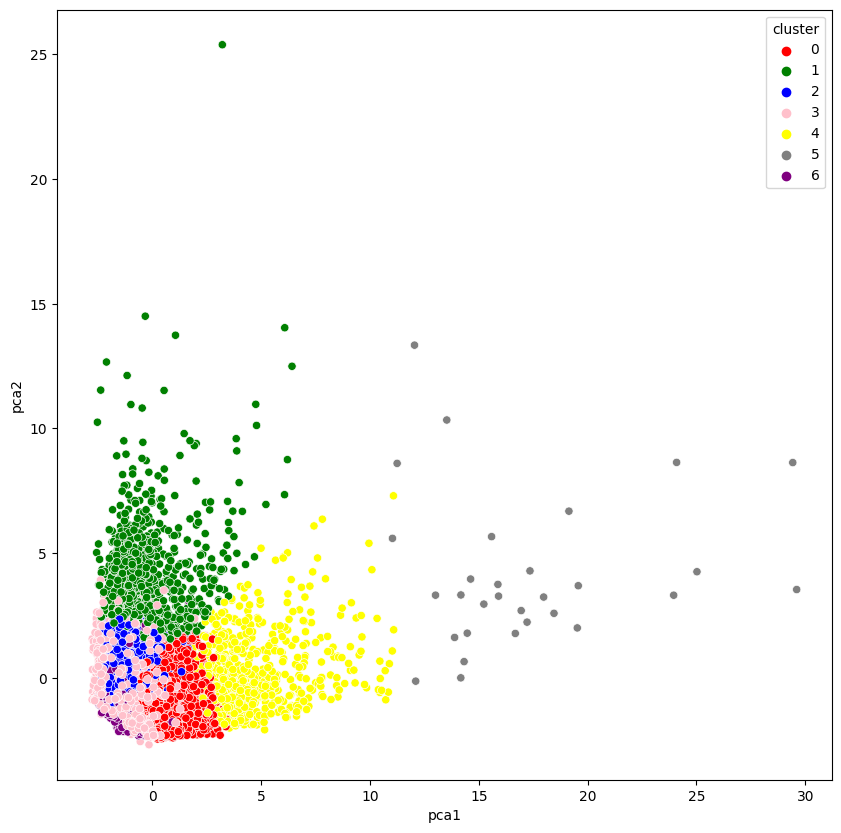

In [24]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

In [25]:
#As we can see, the different hues represent the different segments of customers, computed by PCA